(1024, 1024)


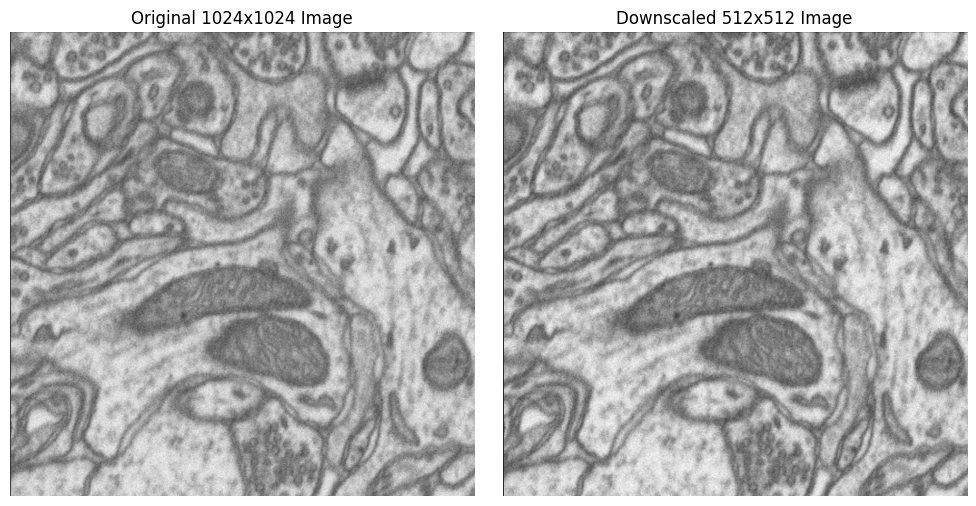

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "/Users/dahirou/jupyter_nn_files/py_stable_diffusion_model/images/cell.png"
input_image = Image.open(image_path)
input_image = np.array(input_image)
input_image = input_image.mean(axis=2) 
print(input_image.shape)

# Assume 'image' is a 1024x1024 NumPy array (e.g., grayscale image)
# For a color image, the shape would be (1024, 1024, 3)



def downscale_image(image):
    # Check if image has a color channel
    if len(image.shape) == 3:
        # Average over 2x2 blocks for each color channel separately
        downscaled_image = image.reshape(512, 2, 512, 2, -1).mean(axis=(1, 3))
    else:
        # Grayscale image
        downscaled_image = image.reshape(512, 2, 512, 2).mean(axis=(1, 3))
    return downscaled_image

# Example usage
# image = np.random.rand(1024, 1024, 3)  # For testing with a color image

downscaled_image = downscale_image(input_image)

# Plot original and downscaled images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(input_image, cmap='gray')
axes[0].set_title("Original 1024x1024 Image")
axes[0].axis("off")

# Display the downscaled image
axes[1].imshow(downscaled_image, cmap='gray')
axes[1].set_title("Downscaled 512x512 Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()


/Users/dahirou/Library/Python/3.12/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


100%|██████████| 50/50 [02:36<00:00,  3.14s/it]


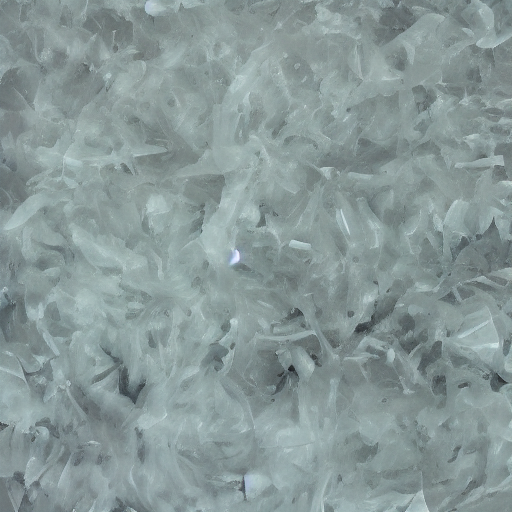

In [2]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("/Users/dahirou/jupyter_nn_files/py_stable_diffusion_model/data/vocab.json", 
        merges_file="/Users/dahirou/jupyter_nn_files/py_stable_diffusion_model/data/merges.txt")
model_file = "/Users/dahirou/jupyter_nn_files/py_stable_diffusion_model/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "Grayscale brain cell scan"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 1  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
# image_path = "/Users/dahirou/jupyter_nn_files/py_stable_diffusion_model/images/cell.png"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.2

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)